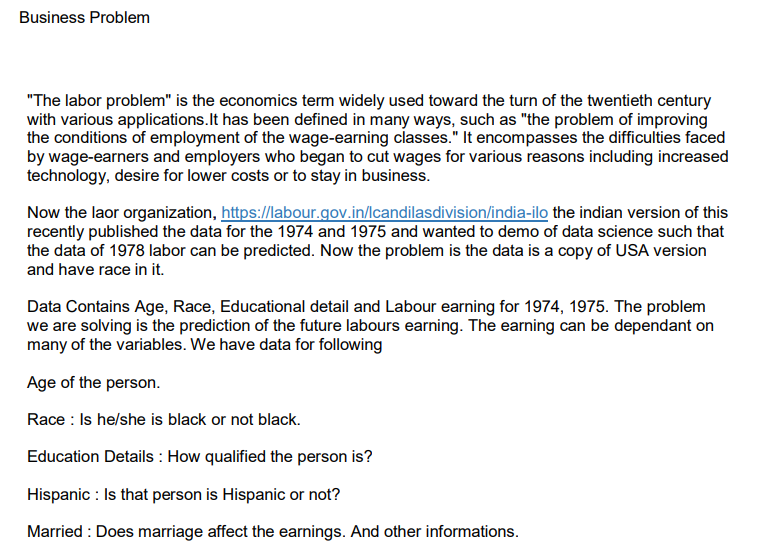

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
data = pd.read_csv('/content/The labor problem.csv')

In [ ]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15992 entries, 0 to 15991
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            15992 non-null  int64  
 1   Eduacation     15992 non-null  object 
 2   Race           15992 non-null  object 
 3   Hisp           15992 non-null  object 
 4   MaritalStatus  15992 non-null  object 
 5   Nodeg          15992 non-null  int64  
 6   Earnings_1974  15992 non-null  float64
 7   Earnings_1975  15992 non-null  float64
 8   Earnings_1978  15992 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB
None


In [ ]:
# Preprocessing: OneHotEncode categorical variables
categorical_cols = ['Eduacation', 'Race', 'Hisp', 'MaritalStatus']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [ ]:
# Define features (X) and target (y)
X = data.drop(['Earnings_1978'], axis=1)
y = data['Earnings_1978']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model using RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 6973.217621811093


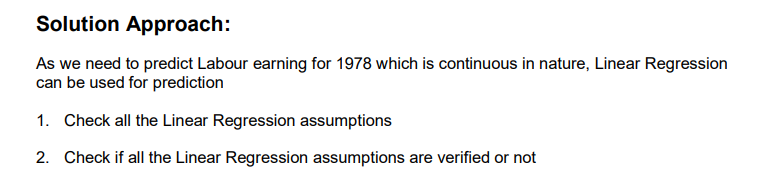

Checking Linearity Assumption...


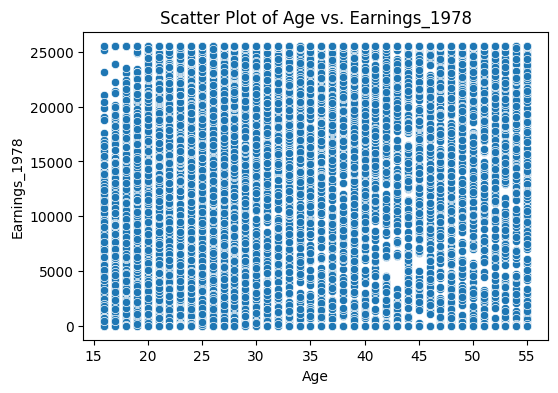

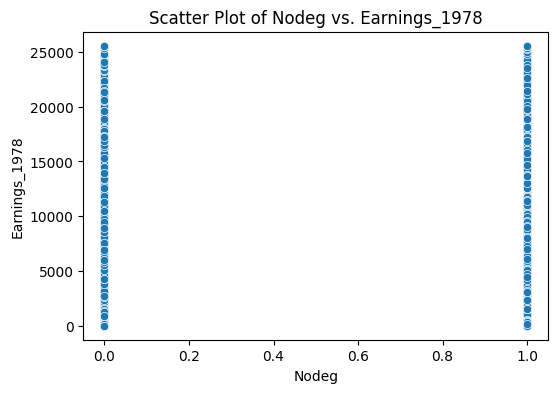

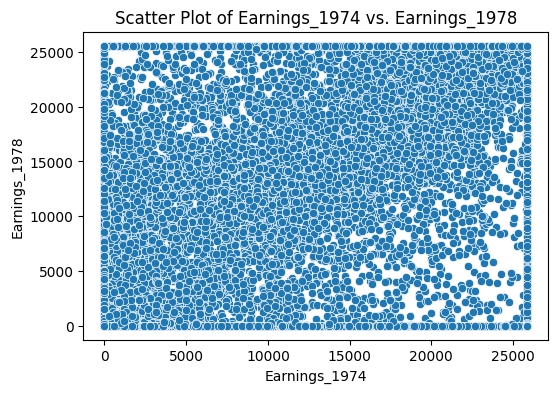

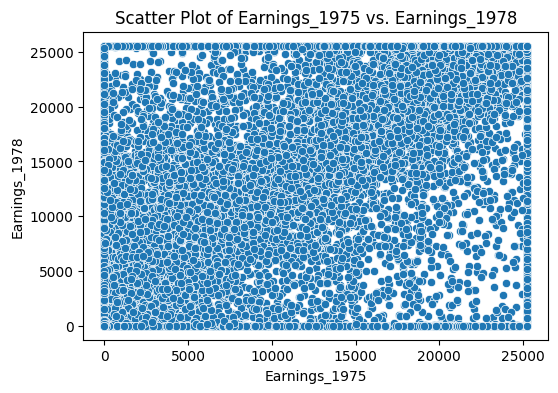

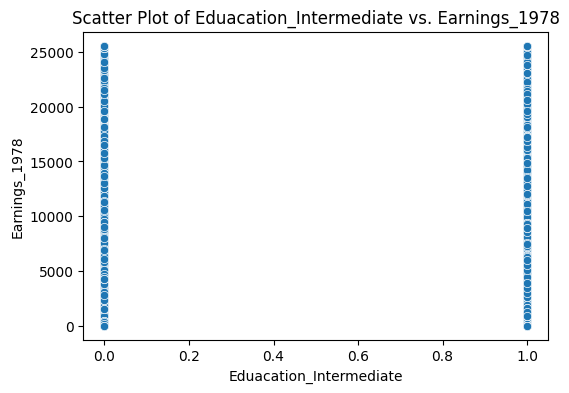

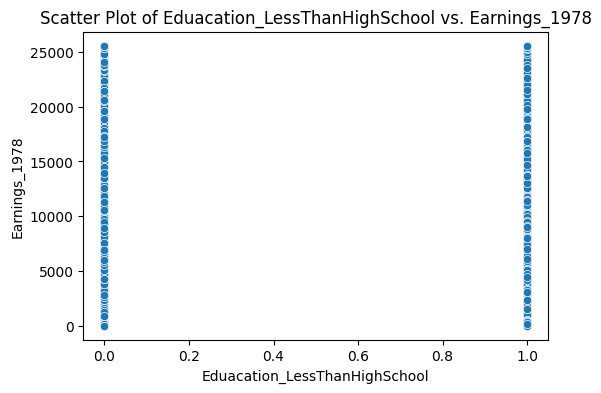

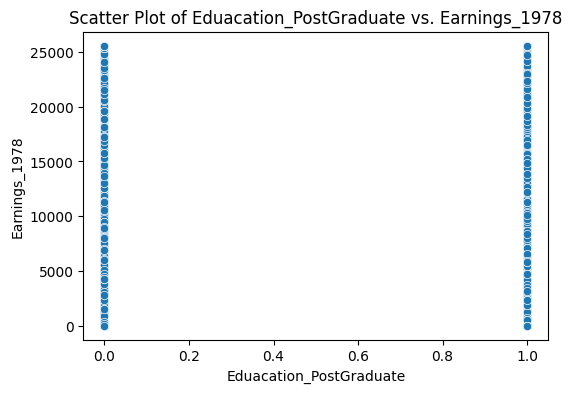

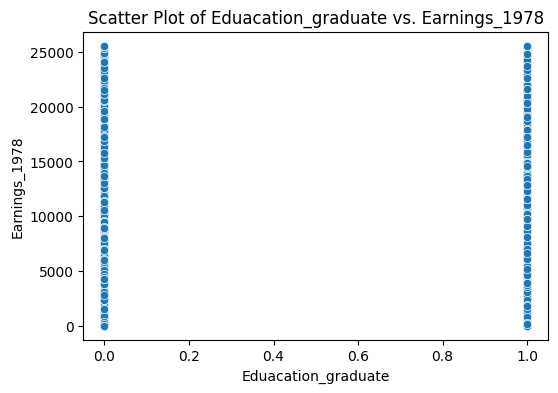

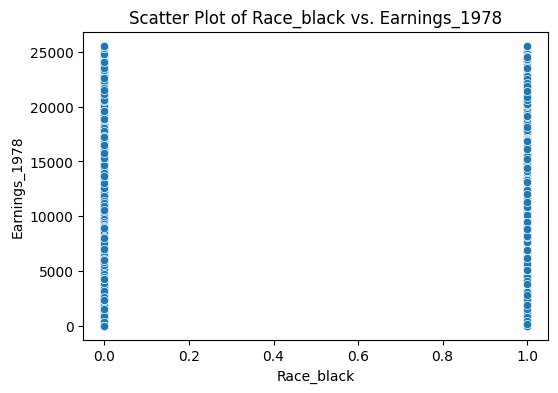

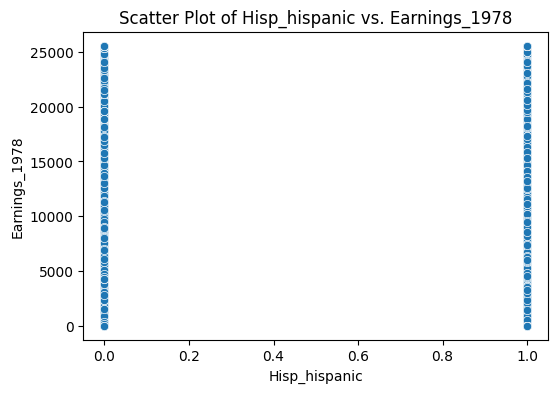

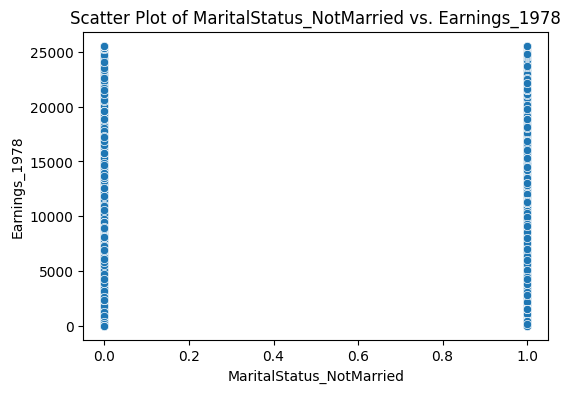

In [ ]:
# 1. Check Linear Regression Assumptions

# Linearity Assumption
print("Checking Linearity Assumption...")
for column in X.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[column], y=y)
    plt.title(f'Scatter Plot of {column} vs. Earnings_1978')
    plt.xlabel(column)
    plt.ylabel('Earnings_1978')
    plt.show()

In [ ]:
# Normality of Residuals
print("Checking Normality of Residuals...")
y_pred_train = model.predict(X_train)
residuals = y_train - y_pred_train

Checking Normality of Residuals...


In [ ]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Residuals Histogram')

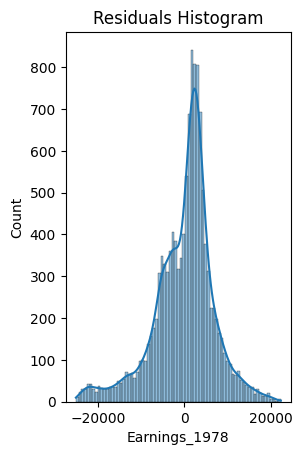

In [ ]:
# Histogram of residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')

Text(0.5, 1.0, 'Q-Q Plot of Residuals')

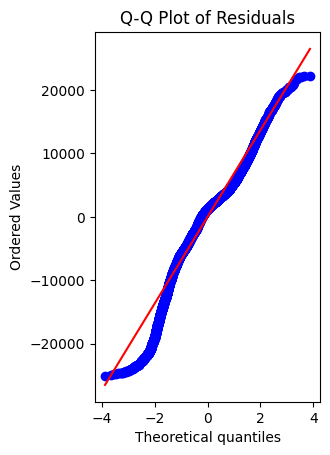

In [ ]:
# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

In [ ]:
plt.show()

Checking Homoscedasticity...


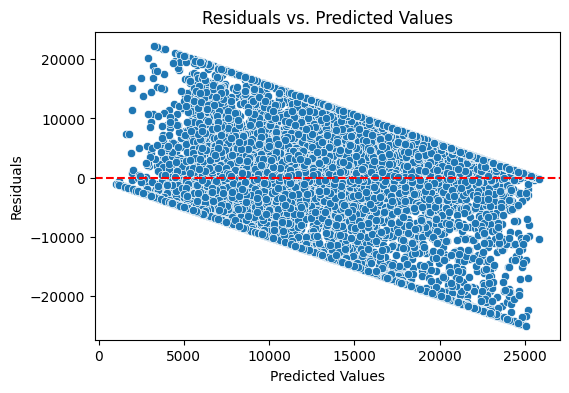

In [ ]:
# Homoscedasticity
print("Checking Homoscedasticity...")
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred_train, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# Multicollinearity
print("Checking Multicollinearity...")
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Convert X to numeric, handling errors
X_numeric = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Explicitly convert all columns to float
for col in X_numeric.columns:
    X_numeric[col] = X_numeric[col].astype(float)

vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i)
                   for i in range(X_numeric.shape[1])]
print(vif_data)

Checking Multicollinearity...


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                          feature        VIF
0                             Age   5.799295
1                           Nodeg        inf
2                   Earnings_1974  13.852094
3                   Earnings_1975  12.992214
4         Eduacation_Intermediate   1.357750
5   Eduacation_LessThanHighSchool        inf
6         Eduacation_PostGraduate   1.136485
7             Eduacation_graduate   1.191066
8                      Race_black   1.099107
9                   Hisp_hispanic   1.105774
10       MaritalStatus_NotMarried   1.326203


In [ ]:
# Independence of Residuals
print("Checking Independence of Residuals...")
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {dw_stat}')

Checking Independence of Residuals...
Durbin-Watson Statistic: 2.007240881854767




---


#END


---

